In [13]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras import layers, models, optimizers, regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adagrad, RMSprop, SGD
from tensorflow.keras.optimizers.experimental import AdamW
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D
from tensorflow.keras.utils import plot_model
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
(x_train, y_train), (x_test, y_test) = mnist.load_data() #load
x_train, x_test = x_train/225.0 , x_test/225.0 #rescale

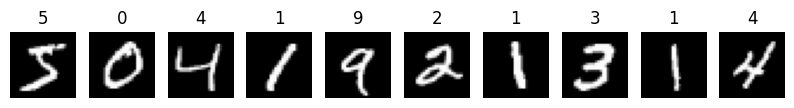

In [15]:
#see the images first 10
plt.figure(figsize=(10, 2))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(x_train[i], cmap="gray")
    plt.title(y_train[i])
    plt.axis("off")
plt.show()

In [16]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

In [17]:
#let's create the model
def build_model_with_reg_n_bn(weight_decay=0.0):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), padding='same', activation=None, kernel_regularizer=regularizers.l2(weight_decay), 
                      input_shape=(28, 28, 1)),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.3),

        layers.Conv2D(64, (3, 3), padding='same', activation=None, kernel_regularizer=regularizers.l2(weight_decay)),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.3),

        layers.Conv2D(128, (3, 3), padding='same', activation=None, kernel_regularizer=regularizers.l2(weight_decay)),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.5),

        layers.Flatten(),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer = optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

optimizers = [('SGD', SGD(learning_rate=1e-3)), ('Adam', Adam(learning_rate=1e-3)), ('Adagrad', Adagrad(learning_rate=1e-3)),
('RMSprop', RMSprop(learning_rate=1e-3)), ('AdamW', AdamW(weight_decay=1e-4, learning_rate=1e-3))]
histories={}

In [18]:
for opt_name, optimizer in optimizers:
    print(f"\nTraining with {opt_name} optimizer.")
    model = build_model_with_reg_n_bn(weight_decay=1e-4 if opt_name == 'AdamW' else 0.0)
    plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(
        x_train, y_train,
        epochs=5,
        batch_size=64,
        validation_split=0.1
    )
    histories[opt_name] = history


Training with SGD optimizer.
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
Epoch 1/5
844/844 [==============================] - 63s 74ms/step - loss: 1.9195 - accuracy: 0.4237 - val_loss: 0.5486 - val_accuracy: 0.8767
Epoch 2/5
844/844 [==============================] - 114s 135ms/step - loss: 0.8784 - accuracy: 0.7075 - val_loss: 0.2982 - val_accuracy: 0.9225
Epoch 3/5
844/844 [==============================] - 99s 117ms/step - loss: 0.6045 - accuracy: 0.8036 - val_loss: 0.2198 - val_accuracy: 0.9427
Epoch 4/5
844/844 [==============================] - 51s 60ms/step - loss: 0.4870 - accuracy: 0.8408 - val_loss: 0.1784 - val_accuracy: 0.9527
Epoch 5/5
844/844 [==============================] - 65s 77ms/step - loss: 0.4141 - accuracy: 0.8678 - val_loss: 0.1574 - val_accuracy: 0.9577

Training with Adam optimizer.
You must install pydot (`pip install pydot`) and install graphviz (see i

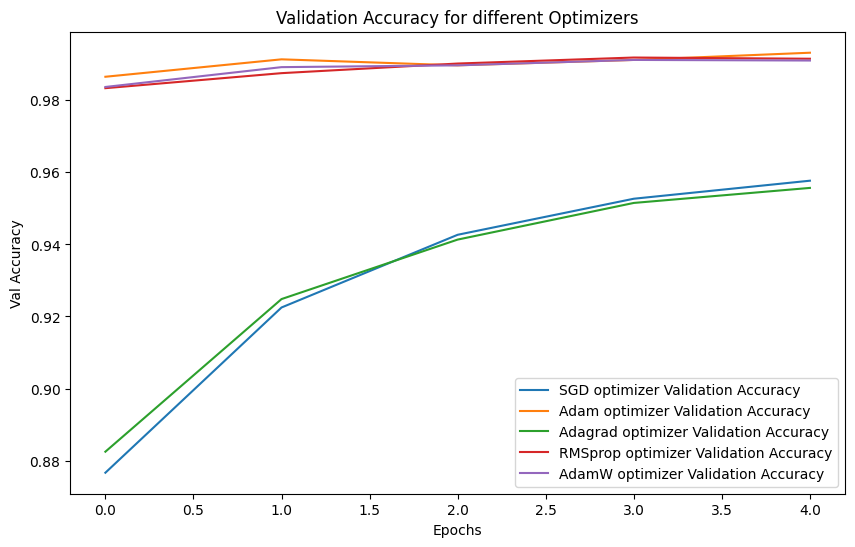

In [19]:
#figure of different optimizers working
plt.figure(figsize=(10, 6))
for opt_name, optimizer in optimizers:
    plt.plot(histories[opt_name].history['val_accuracy'], label=f"{opt_name} optimizer Validation Accuracy")
plt.title("Validation Accuracy for different Optimizers")
plt.xlabel("Epochs")
plt.ylabel("Val Accuracy")
plt.legend()
plt.show()    

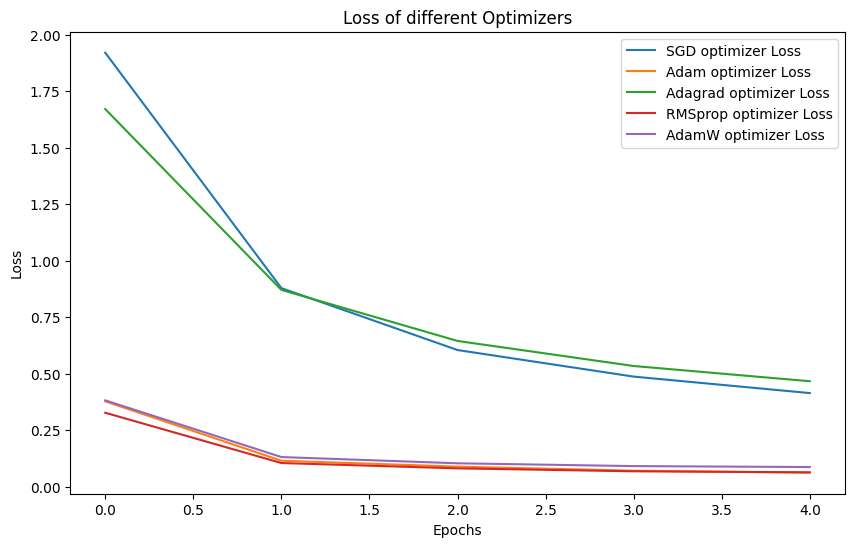

In [20]:
#figure of different loss of optimizers
plt.figure(figsize=(10, 6))
for opt_name,optimizer in optimizers:
    plt.plot(histories[opt_name].history['loss'], label=f"{opt_name} optimizer Loss")
plt.title("Loss of different Optimizers")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()  

In [21]:
#tabulating all
for opt_name,optimizer in optimizers:
    val_accuracy = histories[opt_name].history['val_accuracy'][-1]
    loss = histories[opt_name].history['loss'][-1]
    print(f"{opt_name} → Val Accuracy: {val_accuracy:.4f}, Val Loss: {loss:.4f}")

SGD → Val Accuracy: 0.9577, Val Loss: 0.4141
Adam → Val Accuracy: 0.9932, Val Loss: 0.0619
Adagrad → Val Accuracy: 0.9557, Val Loss: 0.4665
RMSprop → Val Accuracy: 0.9915, Val Loss: 0.0637
AdamW → Val Accuracy: 0.9910, Val Loss: 0.0870
